In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [23]:
train_original = train.copy()
test_original = test.copy()

In [24]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [43]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [27]:
print(train.shape)
print(test.shape)

### Univariate Analysis

(614, 13)
(367, 12)


For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [33]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Proportion will be:

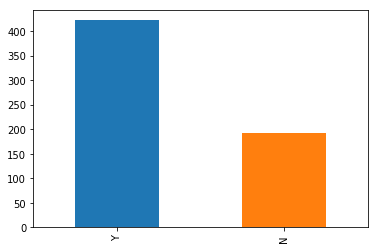

In [35]:
train['Loan_Status'].value_counts().plot.bar()

#### Visualizing Categorical variable

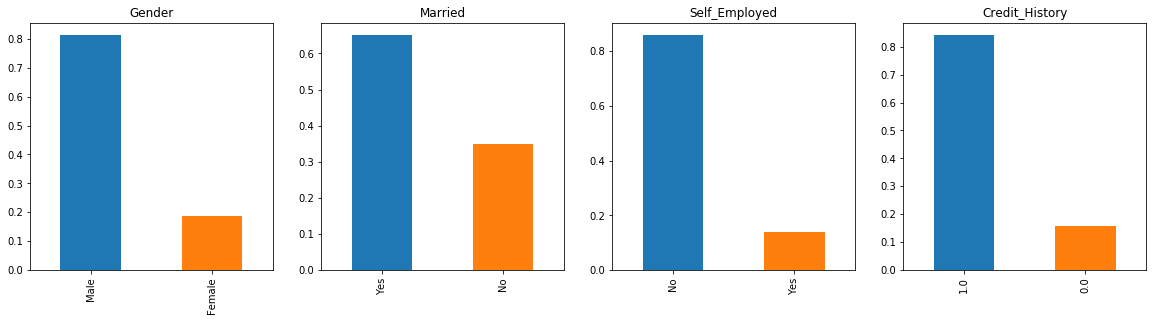

In [65]:
plt.figure(1)
plt.subplot(241)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(242)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Married')

plt.subplot(243)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Self_Employed')

plt.subplot(244)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Credit_History')

plt.show()

It can be inferred from the above bar plots that:

    80% applicants in the dataset are male.
    Around 65% of the applicants in the dataset are married.
    Around 15% applicants in the dataset are self employed.
    Around 85% applicants have repaid their debts.

#### Visualizing Ordinal variable

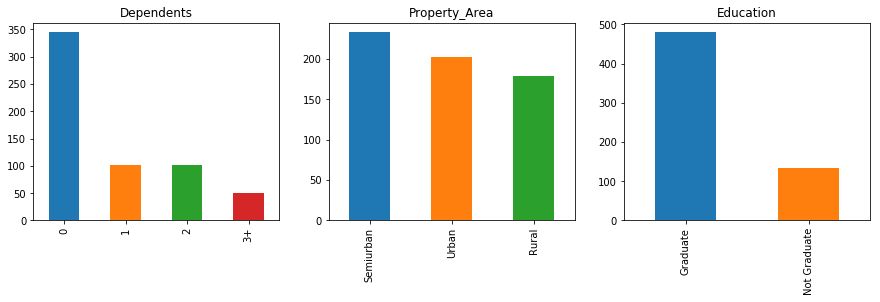

In [66]:
plt.figure(2)

plt.subplot(231)
train['Dependents'].value_counts().plot.bar(figsize = (15,8), title = 'Dependents')

plt.subplot(232)
train['Property_Area'].value_counts().plot.bar(figsize = (15,8), title = 'Property_Area')

plt.subplot(233)
train['Education'].value_counts().plot.bar(figsize = (15,8), title = 'Education')

Following inferences can be made from the above bar plots:

    Most of the applicants don’t have any dependents.
    Around 80% of the applicants are Graduate.
    Most of the applicants are from Semiurban area.

#### Visualizing Numerical Variable

##### Applicant Income

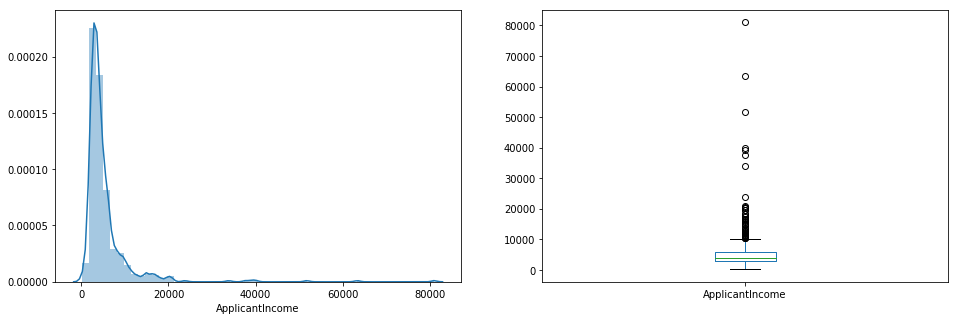

In [78]:
plt.figure(3)

plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Text(0.5,0.98,'')

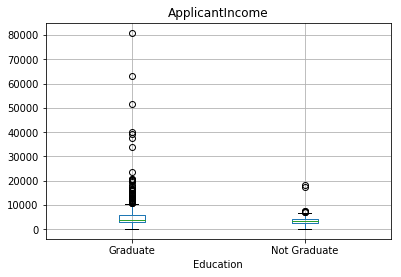

In [85]:
plt.figure(4)
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

##### Coapplicant Income

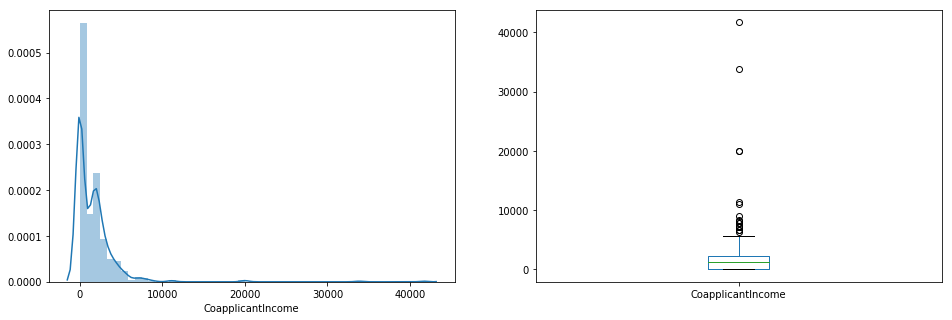

In [87]:
plt.figure(5)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

##### Loan Amount

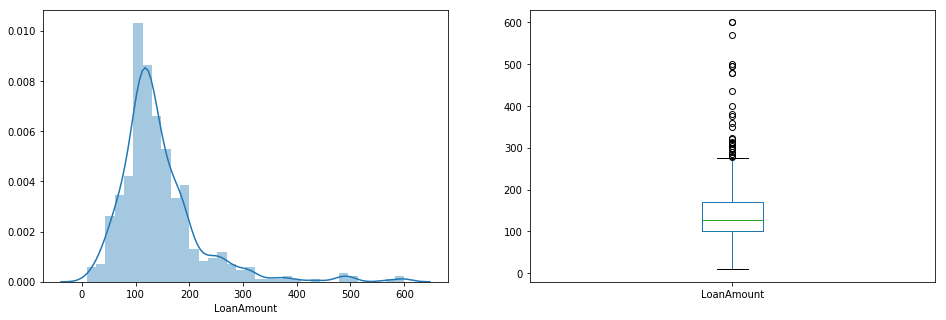

In [90]:
plt.figure(6)

plt.subplot(121)
train_notnull = train.dropna()
sns.distplot(train_notnull['LoanAmount'])

plt.subplot(122)
train_notnull['LoanAmount'].plot.box(figsize = (16,5))

We see a lot of outliers in this variable and the distribution is fairly normal.

### Bivariate Analysis

Lets recall some of the hypotheses that we generated earlier:

Applicants with high income should have more chances of loan approval.
Applicants who have repaid their previous debts should have higher chances of loan approval.
Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Classes can be Binary or Multi types

### Binary Classification Problem

This course is divided into the below sections:

    Introduction to the problem
    Exploratory Data Analysis (EDA) and PreProcessing
    Model building and Feature engineering

#### What is hypothesis generation?
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.`